In [293]:
import pandas as pd


In [358]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import ast
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor





In [295]:
# Load the data
data = pd.read_csv('Project 2_data.csv')
data

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590
2997,2998,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761
2998,2999,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www

In [296]:
# 1. Remove specified columns
columns_to_drop = ['id', 'homepage', 'original_title', 'overview', 'poster_path', 'spoken_languages', 'tagline', 'Keywords']
data.drop(columns=columns_to_drop, inplace=True)
data

,belongs_to_collection,budget,genres,imdb_id,original_language,popularity,production_companies,production_countries,release_date,runtime,status,title,cast,crew,revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,Released,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,Released,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0109403,en,9.853270,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/94,102.0,Released,Chasers,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2996,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",tt2364975,sv,3.727996,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",3/28/13,102.0,Released,We Are the Best!,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590
2997,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",tt0116908,en,14.482345,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/11/96,120.0,Released,The Long Kiss Goodnight,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761
2998,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0343135,en,15.725542,"[{'name': 'Jersey Films', 'id': 216}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1/16/04,90.0,Released,Along Came Polly,"[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386


In [297]:
# 2. Filter rows where 'status' is 'Released'
data = data[data['status'] == 'Released']
data

,belongs_to_collection,budget,genres,imdb_id,original_language,popularity,production_companies,production_countries,release_date,runtime,status,title,cast,crew,revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,Released,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,Released,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0109403,en,9.853270,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/94,102.0,Released,Chasers,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2996,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",tt2364975,sv,3.727996,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",3/28/13,102.0,Released,We Are the Best!,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590
2997,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",tt0116908,en,14.482345,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/11/96,120.0,Released,The Long Kiss Goodnight,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761
2998,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0343135,en,15.725542,"[{'name': 'Jersey Films', 'id': 216}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1/16/04,90.0,Released,Along Came Polly,"[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386


In [298]:
# 6. Change 'release_date' into columns of month and year
data['release_month'] = pd.to_datetime(data['release_date']).dt.month
data['release_year'] = pd.to_datetime(data['release_date']).dt.year
data.drop(columns=['release_date'], inplace=True)
data

C:\Users\Dell\AppData\Local\Temp/ipykernel_13856/2252862169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['release_month'] = pd.to_datetime(data['release_date']).dt.month
C:\Users\Dell\AppData\Local\Temp/ipykernel_13856/2252862169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['release_year'] = pd.to_datetime(data['release_date']).dt.year
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be se

,belongs_to_collection,budget,genres,imdb_id,original_language,popularity,production_companies,production_countries,runtime,status,title,cast,crew,revenue,release_month,release_year
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",93.0,Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,2015
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",113.0,Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,8,2004
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",105.0,Released,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,10,2014
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",122.0,Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,3,2012
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",118.0,Released,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0109403,en,9.853270,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",102.0,Released,Chasers,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,4,1994
2996,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",tt2364975,sv,3.727996,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",102.0,Released,We Are the Best!,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,3,2013
2997,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",tt0116908,en,14.482345,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",120.0,Released,The Long Kiss Goodnight,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,10,1996
2998,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0343135,en,15.725542,"[{'name': 'Jersey Films', 'id': 216}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",90.0,Released,Along Came Polly,"[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386,1,2004


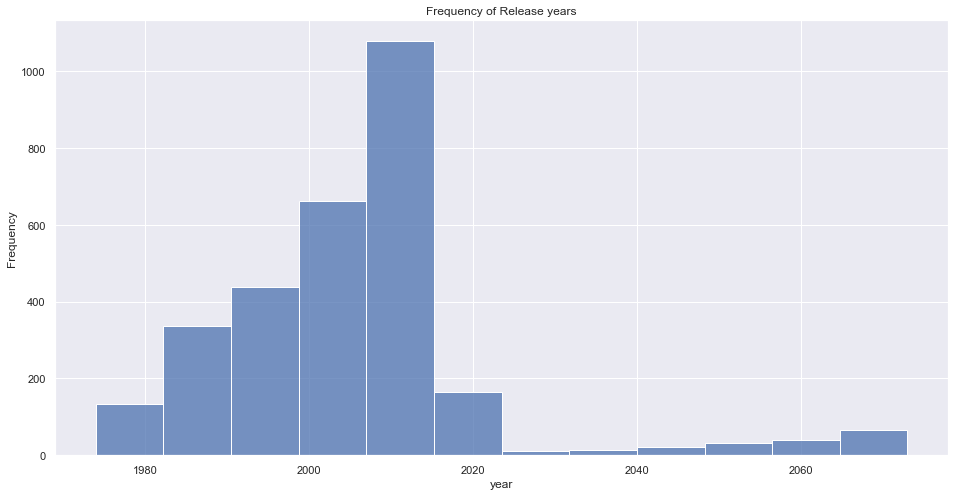

In [299]:
release_year = data['release_year']
sns.histplot(data['release_year'], bins=12, kde=False)
plt.title("Frequency of Release years")
plt.xlabel("year")
plt.ylabel("Frequency")
plt.show()

In [300]:
data = data[data['release_year'] < 2025]
data

,belongs_to_collection,budget,genres,imdb_id,original_language,popularity,production_companies,production_countries,runtime,status,title,cast,crew,revenue,release_month,release_year
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",93.0,Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,2015
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",113.0,Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,8,2004
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",105.0,Released,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,10,2014
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",122.0,Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,3,2012
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",118.0,Released,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0109403,en,9.853270,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",102.0,Released,Chasers,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,4,1994
2996,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",tt2364975,sv,3.727996,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",102.0,Released,We Are the Best!,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,3,2013
2997,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",tt0116908,en,14.482345,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",120.0,Released,The Long Kiss Goodnight,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,10,1996
2998,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0343135,en,15.725542,"[{'name': 'Jersey Films', 'id': 216}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",90.0,Released,Along Came Polly,"[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386,1,2004


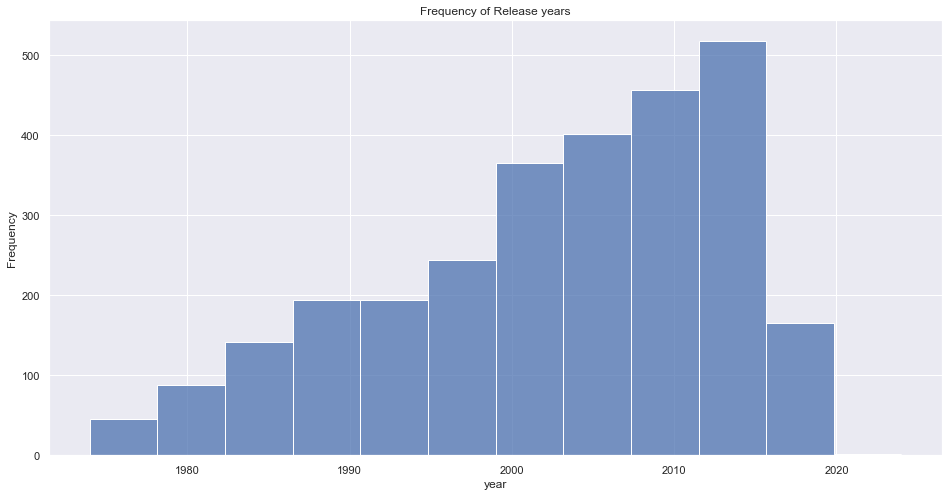

In [301]:
release_year = data['release_year']
sns.histplot(data['release_year'], bins=12, kde=False)
plt.title("Frequency of Release years")
plt.xlabel("year")
plt.ylabel("Frequency")
plt.show()

In [302]:
# 3. Set 'imdb_id' as primary key
data.set_index('imdb_id', inplace=True)
data

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,runtime,status,title,cast,crew,revenue,release_month,release_year
imdb_id,,,,,,,,,,,,,,,
tt2637294,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",93.0,Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,2015
tt0368933,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",113.0,Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,8,2004
tt2582802,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",105.0,Released,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,10,2014
tt1821480,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",122.0,Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,3,2012
tt1380152,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",118.0,Released,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0109403,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,9.853270,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",102.0,Released,Chasers,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,4,1994
tt2364975,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",sv,3.727996,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",102.0,Released,We Are the Best!,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,3,2013
tt0116908,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",en,14.482345,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",120.0,Released,The Long Kiss Goodnight,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,10,1996


In [303]:
# 4. Convert 'original_language' to full form
language_map = {'en': 'English','hi': 'Hindi','ko': 'Korean','sr': 'Serbian','fr': 'French','it': 'Italian',
                'nl': 'Dutch','zh': 'Chinese','es': 'Spanish','cs': 'Czech','ta': 'Tamil','cn': 'Cantonese',
                'ru': 'Russian','tr': 'Turkish','ja': 'Japanese','fa': 'Persian','sv': 'Swedish','de': 'German',
                'te': 'Telugu','pt': 'Portuguese','mr': 'Marathi','da': 'Danish','fi': 'Finnish','el': 'Greek',
                'ur': 'Urdu','he': 'Hebrew','no': 'Norwegian','ar': 'Arabic','nb': 'Norwegian Bokmål',
                'ro': 'Romanian','vi': 'Vietnamese','pl': 'Polish','hu': 'Hungarian','ml': 'Malayalam',
                'bn': 'Bengali','id': 'Indonesian'
}
data['original_language'] = data['original_language'].map(language_map)
data

C:\Users\Dell\AppData\Local\Temp/ipykernel_13856/703210423.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['original_language'] = data['original_language'].map(language_map)


,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,runtime,status,title,cast,crew,revenue,release_month,release_year
imdb_id,,,,,,,,,,,,,,,
tt2637294,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",English,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",93.0,Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,2015
tt0368933,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",English,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",113.0,Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,8,2004
tt2582802,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",English,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",105.0,Released,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,10,2014
tt1821480,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",Hindi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",122.0,Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,3,2012
tt1380152,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",Korean,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",118.0,Released,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0109403,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",English,9.853270,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",102.0,Released,Chasers,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,4,1994
tt2364975,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",Swedish,3.727996,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",102.0,Released,We Are the Best!,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,3,2013
tt0116908,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",English,14.482345,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",120.0,Released,The Long Kiss Goodnight,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,10,1996


In [304]:
# 5. Convert 'belongs_to_collection' to a boolean
data['belongs_to_collection'] = data['belongs_to_collection'].notna()
data

C:\Users\Dell\AppData\Local\Temp/ipykernel_13856/2649970153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['belongs_to_collection'] = data['belongs_to_collection'].notna()


,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,runtime,status,title,cast,crew,revenue,release_month,release_year
imdb_id,,,,,,,,,,,,,,,
tt2637294,True,14000000,"[{'id': 35, 'name': 'Comedy'}]",English,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",93.0,Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,2015
tt0368933,True,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",English,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",113.0,Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,8,2004
tt2582802,False,3300000,"[{'id': 18, 'name': 'Drama'}]",English,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",105.0,Released,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,10,2014
tt1821480,False,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",Hindi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",122.0,Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,3,2012
tt1380152,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",Korean,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",118.0,Released,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0109403,False,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",English,9.853270,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",102.0,Released,Chasers,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,4,1994
tt2364975,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",Swedish,3.727996,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",102.0,Released,We Are the Best!,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,3,2013
tt0116908,False,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",English,14.482345,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",120.0,Released,The Long Kiss Goodnight,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,10,1996


In [305]:
# 7. Split specific columns into lists
import json

def extract_names(json_str):
    try:
        # Replace single quotes with double quotes to correct the JSON format
        json_str = json_str.replace("'", '"')
        # Load the JSON string
        items = json.loads(json_str)
        # Extract and return the names
        return [item['name'] for item in items]
    except Exception as e:
        return []  # Return an empty list in case of any error
    
# Apply the function to each column
for col in ['genres', 'production_companies', 'production_countries']:
    data[col] = data[col].apply(extract_names)
    
data

C:\Users\Dell\AppData\Local\Temp/ipykernel_13856/876312174.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(extract_names)


,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,runtime,status,title,cast,crew,revenue,release_month,release_year
imdb_id,,,,,,,,,,,,,,,
tt2637294,True,14000000,[Comedy],English,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],93.0,Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,2015
tt0368933,True,40000000,"[Comedy, Drama, Family, Romance]",English,8.248895,[Walt Disney Pictures],[United States of America],113.0,Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,8,2004
tt2582802,False,3300000,[Drama],English,64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],105.0,Released,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,10,2014
tt1821480,False,1200000,"[Thriller, Drama]",Hindi,3.174936,[],[India],122.0,Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,3,2012
tt1380152,False,0,"[Action, Thriller]",Korean,1.148070,[],[South Korea],118.0,Released,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0109403,False,0,"[Comedy, Romance]",English,9.853270,"[Warner Bros., Morgan Creek Productions]",[United States of America],102.0,Released,Chasers,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,4,1994
tt2364975,False,0,"[Drama, Music]",Swedish,3.727996,"[Memfis Film, Film i Väst]","[Denmark, Sweden]",102.0,Released,We Are the Best!,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,3,2013
tt0116908,False,65000000,"[Crime, Action, Mystery, Thriller]",English,14.482345,"[New Line Cinema, Forge, The Steve Tisch Company]",[United States of America],120.0,Released,The Long Kiss Goodnight,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,10,1996


In [306]:
# # Calculate IQR for the budget data
# Q1 = data['budget'].quantile(0.25)
# Q3 = data['budget'].quantile(0.75)
# IQR = Q3 - Q1

# # Define outliers as budgets outside the range of [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter out the outliers
# data = data[(data['budget'] >= lower_bound) & (data['budget'] <= upper_bound)]

# # Output the shape of the original and the filtered datasets
# original_shape = data.shape[0]
# filtered_shape = data.shape[0]
# lower_bound, upper_bound, original_shape, filtered_shape
# data

In [307]:
# 8. Replace 'runtime' with mean where it is 0
for col in ['runtime']:
    mean_value = data[data[col] != 0][col].mean()  # Calculate mean excluding zeros
    data[col] = data[col].replace(0, mean_value)   # Replace zeros with the mean
    data[col] = data[col].fillna(mean_value)       # Replace NaNs with the mean
data

C:\Users\Dell\AppData\Local\Temp/ipykernel_13856/2436567054.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].replace(0, mean_value)   # Replace zeros with the mean
C:\Users\Dell\AppData\Local\Temp/ipykernel_13856/2436567054.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].fillna(mean_value)       # Replace NaNs with the mean


,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,runtime,status,title,cast,crew,revenue,release_month,release_year
imdb_id,,,,,,,,,,,,,,,
tt2637294,True,14000000,[Comedy],English,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],93.0,Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,2015
tt0368933,True,40000000,"[Comedy, Drama, Family, Romance]",English,8.248895,[Walt Disney Pictures],[United States of America],113.0,Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,8,2004
tt2582802,False,3300000,[Drama],English,64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],105.0,Released,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,10,2014
tt1821480,False,1200000,"[Thriller, Drama]",Hindi,3.174936,[],[India],122.0,Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,3,2012
tt1380152,False,0,"[Action, Thriller]",Korean,1.148070,[],[South Korea],118.0,Released,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0109403,False,0,"[Comedy, Romance]",English,9.853270,"[Warner Bros., Morgan Creek Productions]",[United States of America],102.0,Released,Chasers,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,4,1994
tt2364975,False,0,"[Drama, Music]",Swedish,3.727996,"[Memfis Film, Film i Väst]","[Denmark, Sweden]",102.0,Released,We Are the Best!,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,3,2013
tt0116908,False,65000000,"[Crime, Action, Mystery, Thriller]",English,14.482345,"[New Line Cinema, Forge, The Steve Tisch Company]",[United States of America],120.0,Released,The Long Kiss Goodnight,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,10,1996


In [308]:
# 9. Create 'profit' as 'revenue' minus 'budget'
data['profit'] = data['revenue'] - data['budget']
data

C:\Users\Dell\AppData\Local\Temp/ipykernel_13856/3433201548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['profit'] = data['revenue'] - data['budget']


,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,runtime,status,title,cast,crew,revenue,release_month,release_year,profit
imdb_id,,,,,,,,,,,,,,,,
tt2637294,True,14000000,[Comedy],English,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],93.0,Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,2015,-1685349
tt0368933,True,40000000,"[Comedy, Drama, Family, Romance]",English,8.248895,[Walt Disney Pictures],[United States of America],113.0,Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,8,2004,55149435
tt2582802,False,3300000,[Drama],English,64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],105.0,Released,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,10,2014,9792000
tt1821480,False,1200000,"[Thriller, Drama]",Hindi,3.174936,[],[India],122.0,Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,3,2012,14800000
tt1380152,False,0,"[Action, Thriller]",Korean,1.148070,[],[South Korea],118.0,Released,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2,2009,3923970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0109403,False,0,"[Comedy, Romance]",English,9.853270,"[Warner Bros., Morgan Creek Productions]",[United States of America],102.0,Released,Chasers,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,4,1994,1596687
tt2364975,False,0,"[Drama, Music]",Swedish,3.727996,"[Memfis Film, Film i Väst]","[Denmark, Sweden]",102.0,Released,We Are the Best!,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,3,2013,180590
tt0116908,False,65000000,"[Crime, Action, Mystery, Thriller]",English,14.482345,"[New Line Cinema, Forge, The Steve Tisch Company]",[United States of America],120.0,Released,The Long Kiss Goodnight,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,10,1996,24456761


In [309]:
# Define a function to categorize movies based on profit
def categorize_movie(profit):
    if profit > 100000000:
        return 'Super Duper Hit'
    elif 10000000 <= profit <= 100000000:
        return 'Super Hit'
    elif 1000000 <= profit <= 10000000:
        return 'Average'
    elif profit <= 0:
        return 'Flop'

# Apply the function to create a new column
data['movie_category'] = data['profit'].apply(categorize_movie)
data

C:\Users\Dell\AppData\Local\Temp/ipykernel_13856/669492396.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['movie_category'] = data['profit'].apply(categorize_movie)


,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,runtime,status,title,cast,crew,revenue,release_month,release_year,profit,movie_category
imdb_id,,,,,,,,,,,,,,,,,
tt2637294,True,14000000,[Comedy],English,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],93.0,Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,2015,-1685349,Flop
tt0368933,True,40000000,"[Comedy, Drama, Family, Romance]",English,8.248895,[Walt Disney Pictures],[United States of America],113.0,Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,8,2004,55149435,Super Hit
tt2582802,False,3300000,[Drama],English,64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],105.0,Released,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,10,2014,9792000,Average
tt1821480,False,1200000,"[Thriller, Drama]",Hindi,3.174936,[],[India],122.0,Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,3,2012,14800000,Super Hit
tt1380152,False,0,"[Action, Thriller]",Korean,1.148070,[],[South Korea],118.0,Released,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2,2009,3923970,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0109403,False,0,"[Comedy, Romance]",English,9.853270,"[Warner Bros., Morgan Creek Productions]",[United States of America],102.0,Released,Chasers,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,4,1994,1596687,Average
tt2364975,False,0,"[Drama, Music]",Swedish,3.727996,"[Memfis Film, Film i Väst]","[Denmark, Sweden]",102.0,Released,We Are the Best!,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,3,2013,180590,None
tt0116908,False,65000000,"[Crime, Action, Mystery, Thriller]",English,14.482345,"[New Line Cinema, Forge, The Steve Tisch Company]",[United States of America],120.0,Released,The Long Kiss Goodnight,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,10,1996,24456761,Super Hit


c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

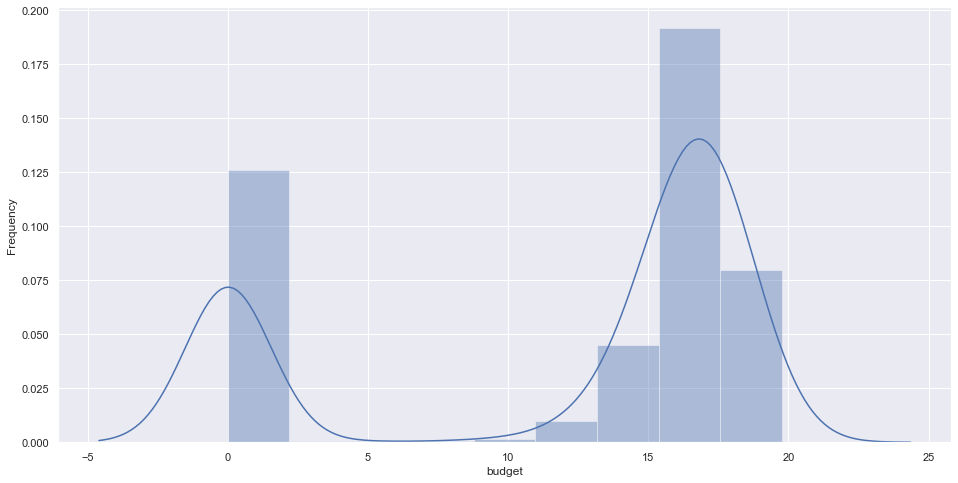

In [310]:
budget = data['budget']
# sns.distplot(budget).set_ylabel("Frequency")

log_budget = np.log1p(budget)
sns.distplot(log_budget).set_ylabel("Frequency")

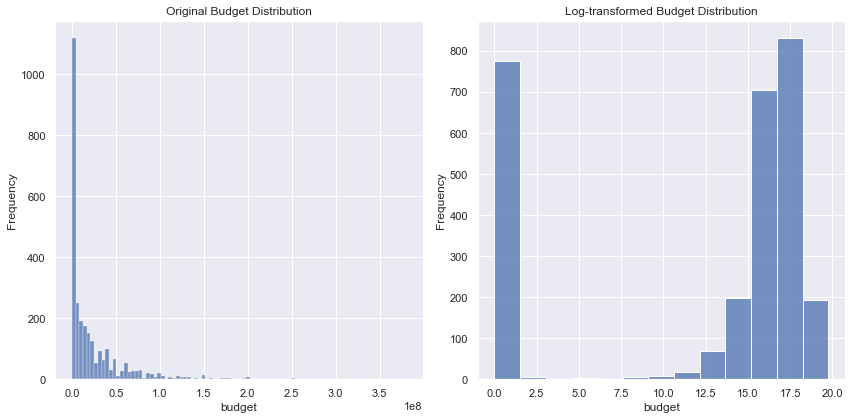

In [311]:
budget = data['budget']
# sns.distplot(budget).set_ylabel("Frequency")

log_budget = np.log1p(budget)
# sns.distplot(log_budget).set_ylabel("Frequency")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot original budget distribution
sns.histplot(budget, ax=axes[0]).set_ylabel("Frequency")
axes[0].set_title('Original Budget Distribution')

# Plot log-transformed budget distribution
sns.histplot(log_budget, ax=axes[1]).set_ylabel("Frequency")
axes[1].set_title('Log-transformed Budget Distribution')

plt.tight_layout()
plt.show()

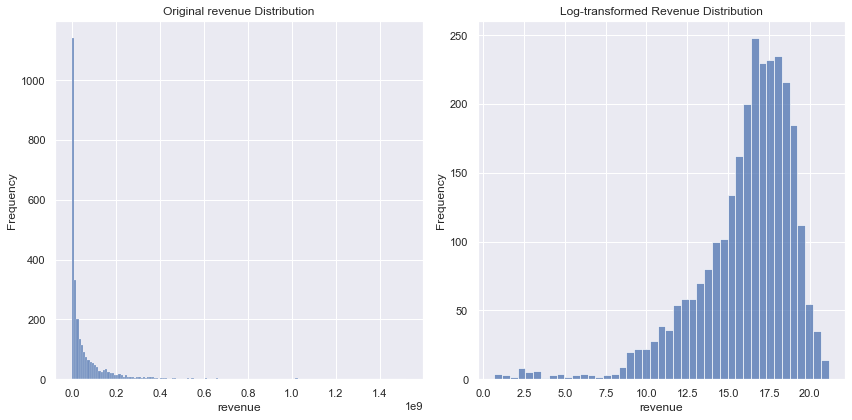

In [312]:
revenue = data['revenue']
# sns.distplot(revenue).set_ylabel("Frequency")

log_revenue = np.log1p(revenue)
# sns.distplot(log_revenue).set_ylabel("Frequency")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot original revenue distribution
sns.histplot(revenue, ax=axes[0]).set_ylabel("Frequency")
axes[0].set_title('Original revenue Distribution')

# Plot log-transformed revenue distribution
sns.histplot(log_revenue, ax=axes[1]).set_ylabel("Frequency")
axes[1].set_title('Log-transformed Revenue Distribution')

plt.tight_layout()
plt.show()

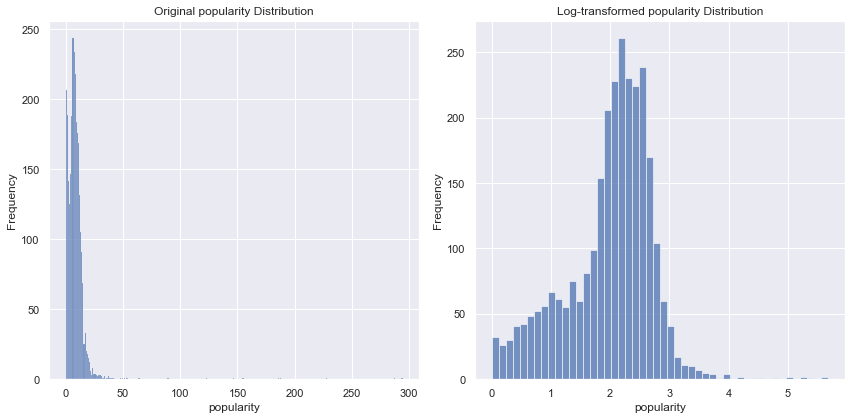

In [313]:
popularity = data['popularity']
# sns.distplot(popularity).set_ylabel("Frequency")

log_popularity = np.log1p(popularity)
# sns.distplot(log_popularity).set_ylabel("Frequency")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot original popularity distribution
sns.histplot(popularity, ax=axes[0]).set_ylabel("Frequency")
axes[0].set_title('Original popularity Distribution')

# Plot log-transformed popularity distribution
sns.histplot(log_popularity, ax=axes[1]).set_ylabel("Frequency")
axes[1].set_title('Log-transformed popularity Distribution')

plt.tight_layout()
plt.show()

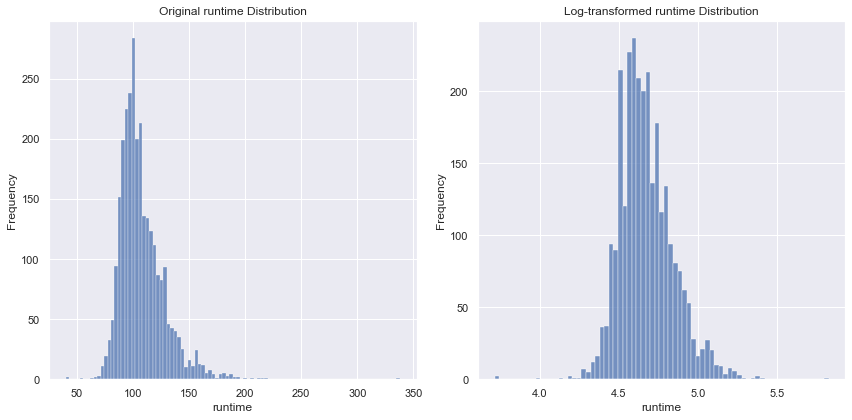

In [314]:
runtime = data['runtime']
# sns.distplot(runtime).set_ylabel("Frequency")

log_runtime = np.log1p(runtime)
# sns.distplot(log_runtime).set_ylabel("Frequency")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot original runtime distribution
sns.histplot(runtime, ax=axes[0]).set_ylabel("Frequency")
axes[0].set_title('Original runtime Distribution')

# Plot log-transformed runtime distribution
sns.histplot(log_runtime, ax=axes[1]).set_ylabel("Frequency")
axes[1].set_title('Log-transformed runtime Distribution')

plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp/ipykernel_13856/397171486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_genres'] = data['genres'].apply(lambda x: len(x))


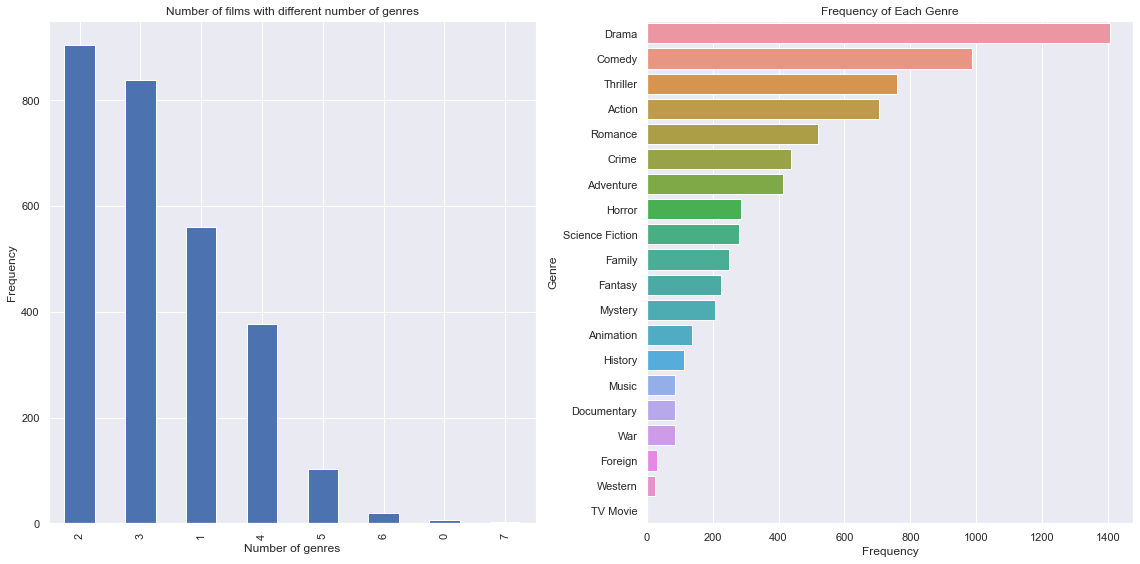

In [315]:
# Plotting genre
sns.set(rc={'figure.figsize':(16,8)})  # Adjusting figure size
plt.subplot(1, 2, 1)  # First subplot
data['num_genres'] = data['genres'].apply(lambda x: len(x))
data['num_genres'].value_counts().plot.bar()
plt.title("Number of films with different number of genres")
plt.xlabel("Number of genres")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)  # Second subplot
# Flatten the list of genres
all_genres = [genre for sublist in data['genres'] for genre in sublist]
# Create a countplot
sns.countplot(y=all_genres, order=pd.Series(all_genres).value_counts().index)
plt.title("Frequency of Each Genre")
plt.xlabel("Frequency")
plt.ylabel("Genre")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

C:\Users\Dell\AppData\Local\Temp/ipykernel_13856/127584095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_of_production_countries'] = data['production_countries'].apply(lambda x: len(x))


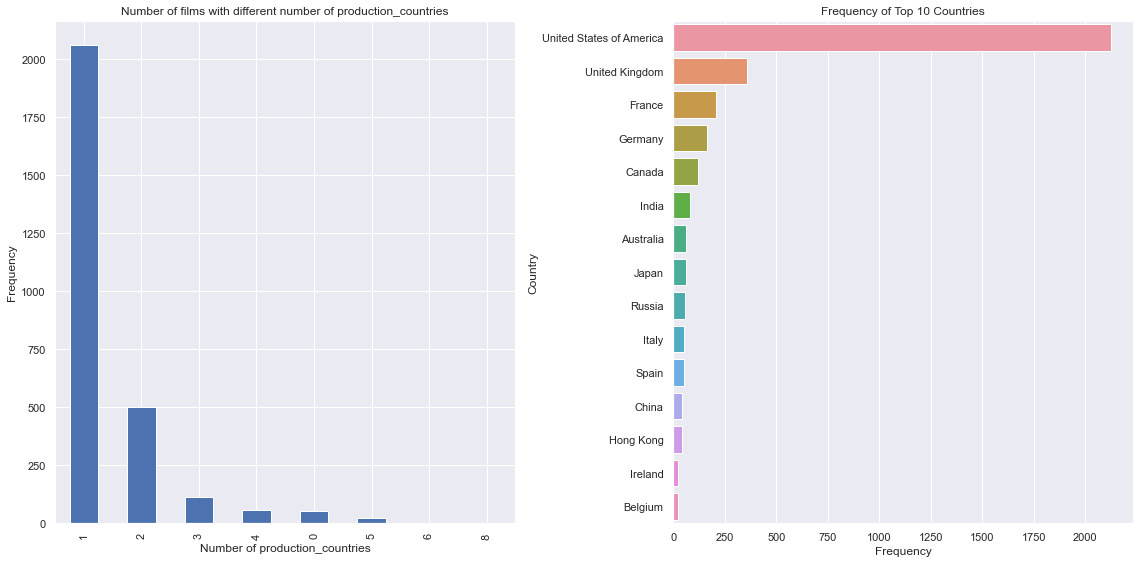

In [316]:
# Plotting num_of_production_countries
sns.set(rc={'figure.figsize':(16,8)})  # Adjusting figure size
plt.subplot(1, 2, 1)  # First subplot
data['num_of_production_countries'] = data['production_countries'].apply(lambda x: len(x))
data['num_of_production_countries'].value_counts().plot.bar()
plt.title("Number of films with different number of production_countries")
plt.xlabel("Number of production_countries")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)  # Second subplot
# Flatten the list of production_countries
all_production_countries = [country for sublist in data['production_countries'] for country in sublist]
# Get the top 10 countries
top_countries = pd.Series(all_production_countries).value_counts().nlargest(15).index
# Filter the data to include only the top 10 countries
top_countries_data = [country for country in all_production_countries if country in top_countries]
# Create a countplot
sns.countplot(y=top_countries_data, order=pd.Series(top_countries_data).value_counts().index)
plt.title("Frequency of Top 10 Countries")
plt.xlabel("Frequency")
plt.ylabel("Country")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

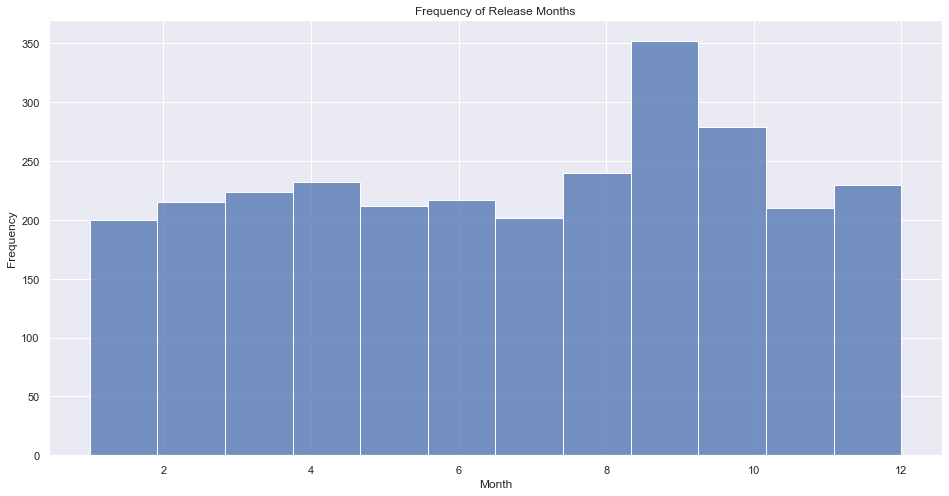

In [317]:
release_month = data['release_month']
sns.histplot(data['release_month'], bins=12, kde=False)
plt.title("Frequency of Release Months")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()



C:\Users\Dell\AppData\Local\Temp/ipykernel_13856/514262214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cast'] = data['cast'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
C:\Users\Dell\AppData\Local\Temp/ipykernel_13856/514262214.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_of_male'] = data['cast'].apply(lambda x: sum(1 for member in x if member.get('gender') == 2))
C:\Users\Dell\AppData\Local\Temp/ipykernel_13856/514262214.py:6: SettingWithCopyWarning: 
A

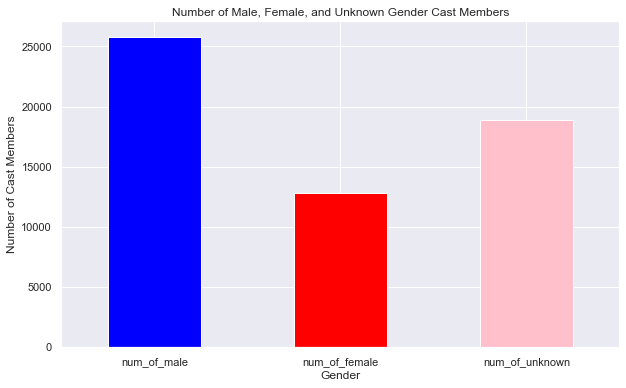

In [318]:
# Convert string representation of list to actual list of dictionaries
data['cast'] = data['cast'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Count the number of each gender for each movie
data['num_of_male'] = data['cast'].apply(lambda x: sum(1 for member in x if member.get('gender') == 2))
data['num_of_female'] = data['cast'].apply(lambda x: sum(1 for member in x if member.get('gender') == 1))
data['num_of_unknown'] = data['cast'].apply(lambda x: sum(1 for member in x if member.get('gender') == 0))



male_cast_count = data['cast'].str.count("'gender': 2").sum()  # Assuming gender 2 represents male
female_cast_count = data['cast'].str.count("'gender': 1").sum()  # Assuming gender 1 represents female
zero_cast_count = data['cast'].str.count("'gender': 0").sum()  # Assuming gender 2 represents male


# Calculate the total number of movies
total_movies = len(data)

# Plotting
plt.figure(figsize=(10, 6))
data[['num_of_male', 'num_of_female', 'num_of_unknown']].sum().plot(kind='bar', color=['blue', 'red', 'pink'])
plt.title('Number of Male, Female, and Unknown Gender Cast Members')
plt.xlabel('Gender')
plt.ylabel('Number of Cast Members')
plt.xticks(rotation=0)
plt.show()

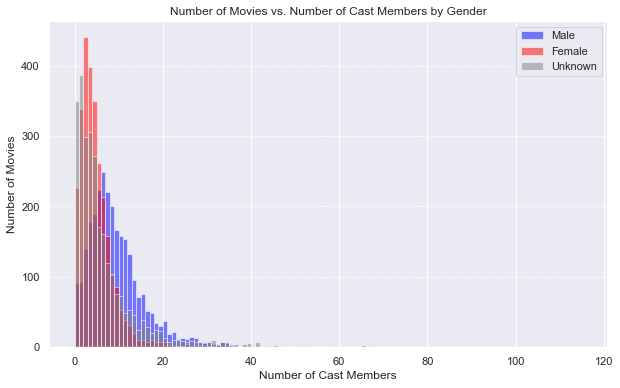

In [333]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting male cast members
plt.hist(data['num_of_male'], bins=np.arange(0, max(data['num_of_male']) + 2, 1), color='blue', alpha=0.5, label='Male')

# Plotting female cast members
plt.hist(data['num_of_female'], bins=np.arange(0, max(data['num_of_female']) + 2, 1), color='red', alpha=0.5, label='Female')

# Plotting unknown gender cast members
plt.hist(data['num_of_unknown'], bins=np.arange(0, max(data['num_of_unknown']) + 2, 1), color='gray', alpha=0.5, label='Unknown')

plt.title('Number of Movies vs. Number of Cast Members by Gender')
plt.xlabel('Number of Cast Members')
plt.ylabel('Number of Movies')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Dell\AppData\Local\Temp/ipykernel_13856/1258256880.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


Text(0.5, 1.0, 'Correlation between numerical features')

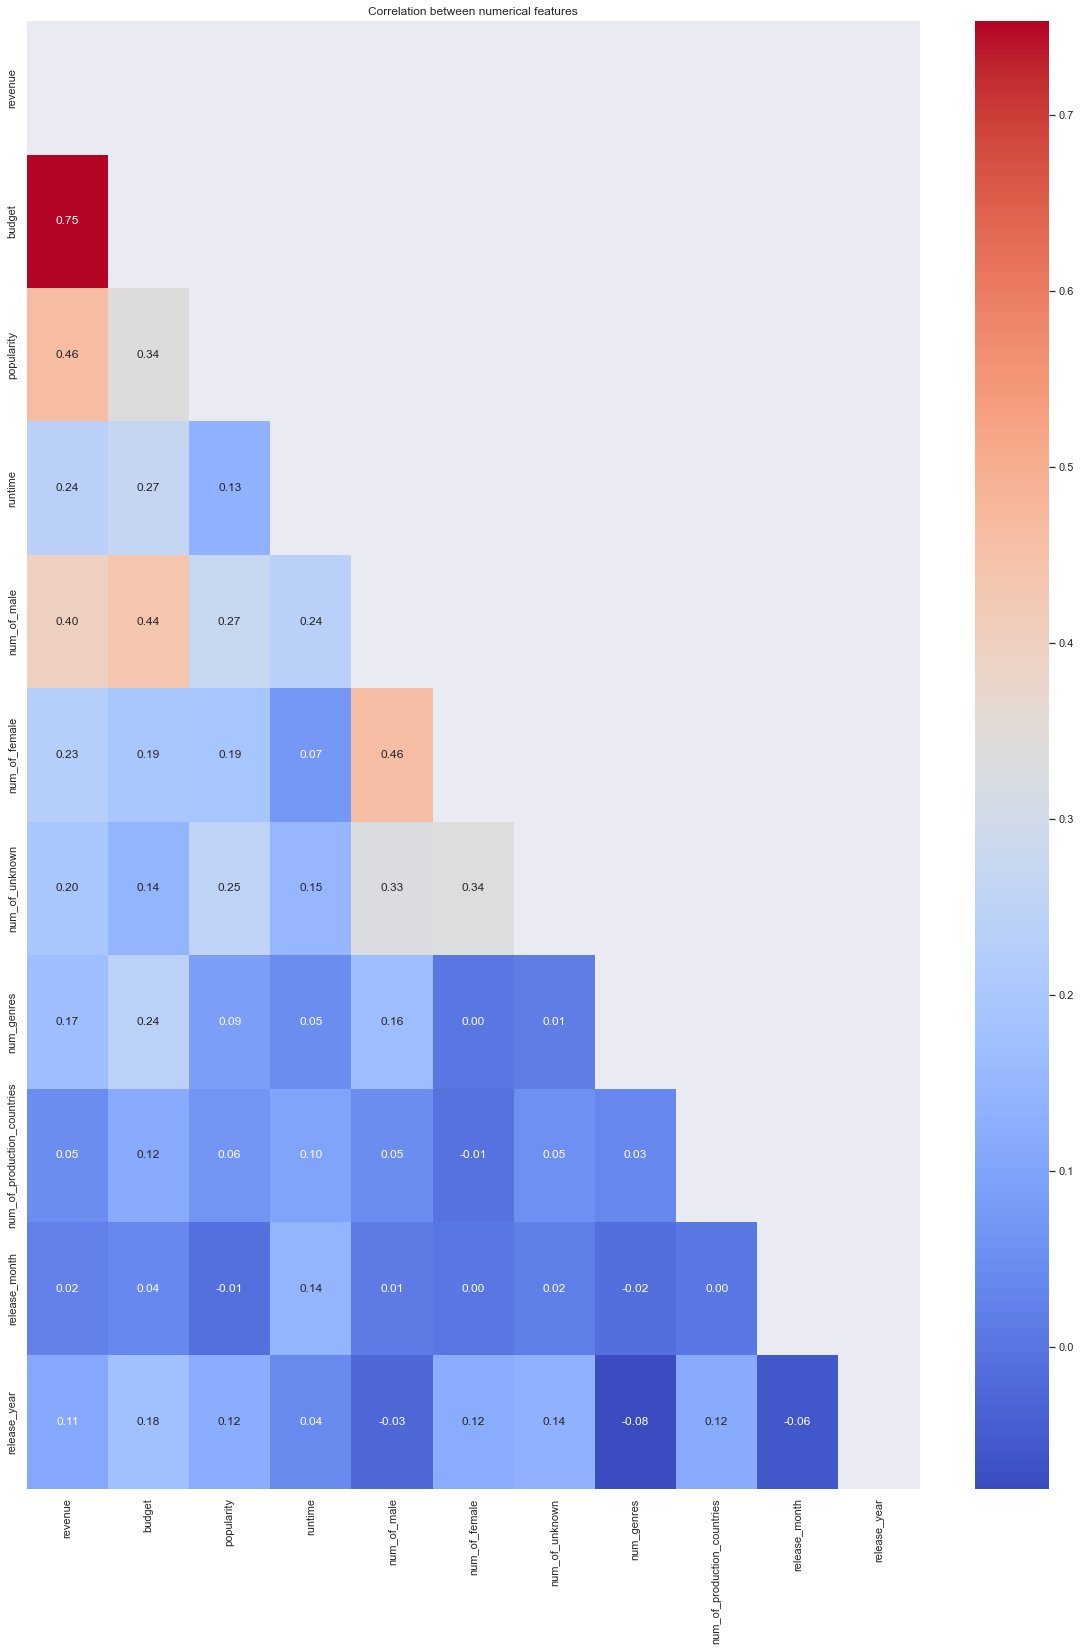

In [334]:
sns.set(rc={'figure.figsize':(20,27)})

# Compute the correlation matrix
corr = data[["revenue", "budget", "popularity", "runtime", "num_of_male",
                 "num_of_female", "num_of_unknown",
                 "num_genres", "num_of_production_countries", "release_month", "release_year"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm')

plt.title("Correlation between numerical features")

In [336]:
data

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,runtime,status,title,...,revenue,release_month,release_year,profit,movie_category,num_genres,num_of_production_countries,num_of_male,num_of_female,num_of_unknown
imdb_id,,,,,,,,,,,,,,,,,,,,,
tt2637294,True,14000000,[Comedy],English,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],93.0,Released,Hot Tub Time Machine 2,...,12314651,2,2015,-1685349,Flop,1,1,10,8,6
tt0368933,True,40000000,"[Comedy, Drama, Family, Romance]",English,8.248895,[Walt Disney Pictures],[United States of America],113.0,Released,The Princess Diaries 2: Royal Engagement,...,95149435,8,2004,55149435,Super Hit,4,1,10,10,0
tt2582802,False,3300000,[Drama],English,64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],105.0,Released,Whiplash,...,13092000,10,2014,9792000,Average,1,1,13,7,31
tt1821480,False,1200000,"[Thriller, Drama]",Hindi,3.174936,[],[India],122.0,Released,Kahaani,...,16000000,3,2012,14800000,Super Hit,2,1,2,1,4
tt1380152,False,0,"[Action, Thriller]",Korean,1.148070,[],[South Korea],118.0,Released,Marine Boy,...,3923970,2,2009,3923970,Average,2,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0109403,False,0,"[Comedy, Romance]",English,9.853270,"[Warner Bros., Morgan Creek Productions]",[United States of America],102.0,Released,Chasers,...,1596687,4,1994,1596687,Average,2,1,11,3,1
tt2364975,False,0,"[Drama, Music]",Swedish,3.727996,"[Memfis Film, Film i Väst]","[Denmark, Sweden]",102.0,Released,We Are the Best!,...,180590,3,2013,180590,None,2,2,1,1,9
tt0116908,False,65000000,"[Crime, Action, Mystery, Thriller]",English,14.482345,"[New Line Cinema, Forge, The Steve Tisch Company]",[United States of America],120.0,Released,The Long Kiss Goodnight,...,89456761,10,1996,24456761,Super Hit,4,1,9,4,2


In [347]:
# Random forest algorithm
X = data[['budget', 'popularity', 'runtime', 'num_of_male', 'num_of_female', 'num_of_unknown', 'num_genres', 'num_of_production_countries', 'release_month', 'release_year']]
y = data['revenue']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("mse -->  ", mse)
print("mae -->  ", mae)
print("r2 -->  ", r2)


mse -->   8609910843421887.0
mae -->   46465651.68538189
r2 -->   0.6340846554793576


In [351]:
#gradient boosting regressor

X = data[['budget', 'popularity', 'runtime', 'num_of_male', 'num_of_female', 'num_of_unknown', 'num_genres', 'num_of_production_countries', 'release_month', 'release_year']]
y = data['revenue']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Model Evaluation
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 9184456944656300.0
Mean Absolute Error (MAE): 47101080.72125267
R-squared (R2) Score: 0.6096668376413475


In [355]:
# XGBoost regression

# Model Training
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Model Evaluation
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Model Metrics:")
print("Mean Squared Error (MSE):", mse_xgb)
print("Mean Absolute Error (MAE):", mae_xgb)
print("R-squared (R2) Score:", r2_xgb)

XGBoost Model Metrics:
Mean Squared Error (MSE): 9178191784987694.0
Mean Absolute Error (MAE): 48500174.63704485
R-squared (R2) Score: 0.6099331026585244


In [356]:
#imputing the zero values in budget by predicting the budget values

# Filter rows with zero budget
zero_budget_data = data[data['budget'] == 0]

# Non-zero budget data
non_zero_budget_data = data[data['budget'] != 0]

# Prepare the data for model training
X_train = non_zero_budget_data[['popularity', 'runtime', 'num_of_male', 'num_of_female', 'num_of_unknown', 'num_genres', 'num_of_production_countries', 'release_month', 'release_year']]
y_train = non_zero_budget_data['budget']

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Use the trained model to predict budget for rows with zero values
X_predict = zero_budget_data[['popularity', 'runtime', 'num_of_male', 'num_of_female', 'num_of_unknown', 'num_genres', 'num_of_production_countries', 'release_month', 'release_year']]
predicted_budget = model.predict(X_predict)

# Replace zero budget values with predicted values
data.loc[data['budget'] == 0, 'budget'] = predicted_budget

# Now the 'budget' column should no longer contain zero values

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [359]:
# XGBoost regression after imputation
# Data Preparation
X = data[['budget', 'popularity', 'runtime', 'num_of_male', 'num_of_female', 'num_of_unknown', 'num_genres', 'num_of_production_countries', 'release_month', 'release_year']]
y = data['revenue']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Model Evaluation
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Model Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

XGBoost Model Metrics:
Mean Squared Error (MSE): 9864803219066534.0
Mean Absolute Error (MAE): 51989025.94246781
R-squared (R2) Score: 0.5807525845298467


In [362]:
data

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,runtime,status,title,...,revenue,release_month,release_year,profit,movie_category,num_genres,num_of_production_countries,num_of_male,num_of_female,num_of_unknown
imdb_id,,,,,,,,,,,,,,,,,,,,,
tt2637294,True,1.400000e+07,[Comedy],English,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],93.0,Released,Hot Tub Time Machine 2,...,12314651,2,2015,-1685349,Flop,1,1,10,8,6
tt0368933,True,4.000000e+07,"[Comedy, Drama, Family, Romance]",English,8.248895,[Walt Disney Pictures],[United States of America],113.0,Released,The Princess Diaries 2: Royal Engagement,...,95149435,8,2004,55149435,Super Hit,4,1,10,10,0
tt2582802,False,3.300000e+06,[Drama],English,64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],105.0,Released,Whiplash,...,13092000,10,2014,9792000,Average,1,1,13,7,31
tt1821480,False,1.200000e+06,"[Thriller, Drama]",Hindi,3.174936,[],[India],122.0,Released,Kahaani,...,16000000,3,2012,14800000,Super Hit,2,1,2,1,4
tt1380152,False,1.960076e+07,"[Action, Thriller]",Korean,1.148070,[],[South Korea],118.0,Released,Marine Boy,...,3923970,2,2009,3923970,Average,2,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0109403,False,2.144794e+07,"[Comedy, Romance]",English,9.853270,"[Warner Bros., Morgan Creek Productions]",[United States of America],102.0,Released,Chasers,...,1596687,4,1994,1596687,Average,2,1,11,3,1
tt2364975,False,1.452601e+07,"[Drama, Music]",Swedish,3.727996,"[Memfis Film, Film i Väst]","[Denmark, Sweden]",102.0,Released,We Are the Best!,...,180590,3,2013,180590,None,2,2,1,1,9
tt0116908,False,6.500000e+07,"[Crime, Action, Mystery, Thriller]",English,14.482345,"[New Line Cinema, Forge, The Steve Tisch Company]",[United States of America],120.0,Released,The Long Kiss Goodnight,...,89456761,10,1996,24456761,Super Hit,4,1,9,4,2


In [349]:
# corelation matrix - 
# CONFIDENCE Matrix
#model - RFC, liner regreesion, CART,  

# # Specify the path and file name for your CSV file
# output_file_path = '/Users/danishsabunwala/Desktop/Spring2024/AML/Project/my_data.csv'

# # Export the DataFrame to CSV
# data.to_csv(output_file_path, index=True)

In [323]:
# # Genres
# def genres_preprocessing(elem):
#     string = str(elem)
#     str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace('\'','').replace(' ','').replace("name", "").replace("id", "").replace(":", "")
#     ll = str1.split(",")[1::2]
#     return ll

# train_df["genres_processed"] = train_df.genres.apply(lambda elem: genres_preprocessing(elem))
# test_df["genres_processed"] = test_df.genres.apply(lambda elem: genres_preprocessing(elem))

# genres_dict = dict()

# for genre in train_df["genres_processed"]:
#     for elem in genre:
#         if elem not in genres_dict:
#             genres_dict[elem] = 1
#         else:
#             genres_dict[elem] += 1


# sns.set(rc={'figure.figsize':(12,8)})
# genres_df = pd.DataFrame.from_dict(genres_dict, orient='index')
# genres_df.columns = ["number_of_movies"]
# genres_df = genres_df.sort_values(by="number_of_movies", ascending=False)
# genres_df.plot.bar()
# plt.title("Number of films per genre")

In [324]:
# #original language
# train_df.original_language.value_counts()[:10].plot.bar()
# plt.title("Number of films per language")

In [325]:
# # English and Non-English movies
# train_df["is_english_language"] = train_df.original_language.apply(lambda x: 1 if x == "en" else 0)
# test_df["is_english_language"] = test_df.original_language.apply(lambda x: 1 if x == "en" else 0)

# train_df.is_english_language = train_df.is_english_language.fillna(1)
# test_df.is_english_language = test_df.is_english_language.fillna(1)

# sns.set(rc={'figure.figsize':(12,8)})
# ax = sns.countplot(x="is_english_language", data=train_df)

In [326]:
# # Production Companies
# def production_companies_preprocessing(elem):
#     string = str(elem)
#     str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("id", "").replace(":", "").replace("\'", "")
#     ll = str1.split(",")[0::2]
#     return ll

# train_df["production_companies"] = train_df.production_companies.fillna('NoProductionCompany')
# train_df["production_companies"] = test_df.production_companies.fillna('NoProductionCompany')

# train_df["production_companies_processed"] = train_df.production_companies.apply(lambda elem: production_companies_preprocessing(elem))
# test_df["production_companies_processed"] = test_df.production_companies.apply(lambda elem: production_companies_preprocessing(elem))



# production_companies_dict = dict()

# for production_company in train_df["production_companies_processed"]:
#     for elem in production_company:
#         if elem not in production_companies_dict:
#             production_companies_dict[elem] = 1
#         else:
#             production_companies_dict[elem] += 1


# sns.set(rc={'figure.figsize':(12,8)})
# production_companies_df = pd.DataFrame.from_dict(production_companies_dict, orient='index')
# production_companies_df.columns = ["number_of_movies"]
# production_companies_df = production_companies_df.sort_values(by="number_of_movies", ascending=False)
# production_companies_df.head(10).plot.bar()
# plt.title("Number of films per production company")

In [327]:
# # production_countries
# def production_countries_preprocessing(elem):
#     string = str(elem)
#     str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("iso_3166_1", "").replace(":", "").replace("\'", "")
#     ll = str1.split(",")[0::2]
#     return ll

# train_df["production_countries_processed"] = train_df.production_countries.fillna("NaN").apply(lambda elem: production_countries_preprocessing(elem))
# test_df["production_countries_processed"] = test_df.production_countries.fillna("NaN").apply(lambda elem: production_countries_preprocessing(elem))


# production_countries_dict = dict()

# for production_country in train_df["production_countries_processed"]:
#     for elem in production_country:
#         if elem not in production_countries_dict:
#             production_countries_dict[elem] = 1
#         else:
#             production_countries_dict[elem] += 1



# production_countries_df = pd.DataFrame.from_dict(production_countries_dict, orient='index')
# production_countries_df.columns = ["number_of_movies"]
# production_countries_df = production_countries_df.sort_values(by="number_of_movies", ascending=False)
# production_countries_df.head(10).plot.bar()
# plt.title("Number of films per production country")

In [328]:
# # Month of Release, which month has most of the releases
# sns.set(rc={'figure.figsize':(12,8)})
# train_df.month.value_counts().plot.bar()
# plt.title('Number of films per month')

In [329]:
# # Bivariate Analysis between each genre and revenue
# for i, g in enumerate(genres_df.index.values):
#     genres_df.loc[g, "median_salary"] = train_df[train_df['isGenre_' + g]==1].revenue.median()

# genres_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10)

In [330]:
# # number_of_movies median_salary
# for i, c in enumerate(production_countries_df.index.values):
#     production_countries_df.loc[c, "median_salary"] = train_df[train_df['isProductionCountry_' + c]==1].revenue.median()

# production_countries_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10)